1. Qu’est ce que le covid19_tweets ?

Il s'agit d'un ensemble de données de application twitter, qui résume les nouvelles publiées par les utilisateurs de Twitter du monde entier sur le nouveau coronavirus covid19, ainsi que certaines données d'attributs personnels des utilisateurs, qui peuvent refléter le degré d'attention des gens envers covid19.

2. Importer les librairies nécessaires et charger les données

3. Afficher les données et commentez le dataset
Pour les questions suivantes, choisir une entreprise dans le dataset dans le but de s’intéresser uniquement à cette action.
4. Utilisez la technique de dessin la plus appropriée pour dessiner une courbe du nombre d'suiveurs au fil du temps.
5. Que peut on observer ?
Traitement des données vides :
6. Identifiez et donnez le nombre de données vides (en nombre et en %)
7. Quelle stratégie allez vous adopter pour traiter les données manquantes et pourquoi?


In [2]:

#2. Importer les librairies nécessaires et charger les données
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.dates as mdate
import matplotlib.pyplot as plt
%matplotlib inline 
data = pd.read_csv("D:/covid19_tweets.csv",encoding='ANSI',usecols = ['user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','text','hashtags','source','is_retweet'])
data.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,釓夅帴鈽徽倕袭,astroworld,wednesday addams as a disney princess keepin i...,2017/5/26 5:46,624,950,18775,FALSE,2020/7/25 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,FALSE
1,Tom Basile 馃嚭馃嚫,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009/4/16 20:06,2253,1677,24,TRUE,2020/7/25 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,FALSE
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009/2/28 18:57,9275,9525,7254,FALSE,2020/7/25 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,FALSE
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019/3/7 1:45,197,987,1488,FALSE,2020/7/25 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,FALSE
4,DIPR-J&K,Jammu and Kashmir,馃枈锔廜fficial Twitter handle of Department of In...,2017/2/12 6:45,101009,168,101,FALSE,2020/7/25 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,FALSE


In [3]:
#3. Afficher les données et commentez le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181173 entries, 0 to 181172
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         180326 non-null  object
 1   user_location     143371 non-null  object
 2   user_description  169299 non-null  object
 3   user_created      178725 non-null  object
 4   user_followers    177723 non-null  object
 5   user_friends      177680 non-null  object
 6   user_favourites   177503 non-null  object
 7   user_verified     177143 non-null  object
 8   date              176926 non-null  object
 9   text              175984 non-null  object
 10  hashtags          127481 non-null  object
 11  source            176514 non-null  object
 12  is_retweet        173123 non-null  object
dtypes: object(13)
memory usage: 18.0+ MB


le dataset contient beaucoup de données ,près de deux cent mille lignes et 13 colonnes.Les colonnes comprendre :
user_name: le nom d'utilisateur de Twitter
uer_location：L'emplacement géographique où réside l'utilisateur
user_description：Auto-introduction de l'utilisateur
user_created:Date à laquelle l'utilisateur a créé ce compte de twitter
user_followers:Le nombre d'autres utilisateurs qui se sont abonnés à cet utilisateur
user_friends：Amis de cet utilisateur qui se suivent
user_favourites：Le nombre d'autres utilisateurs que cet utilisateur aime et abonnés
user_verified：Nombre de modifications par l'utilisateur
date：Heure de publication de Twitter messages
text:Contenu textuel Twitter publié par les utilisateurs
 hashtags：Mots-clés de sujets populaires utilisés par les utilisateurs
 source：équipement de terminal de l'utilisateur utilisant Twitter
 is_retweet ：Le nombre de fois qu'un message Twitter a été retweeté

## utilisateur IMF
Dans la partie suivante, nous nous concentrerons sur l'utilisateur IMF, qui compte près de 1,7 million d'abonnés et est un utilisateur important et influent sur Twitter.

In [4]:
#4. Utilisez la technique de dessin la plus appropriée pour dessiner une courbe du nombre d'suiveurs au fil du temps.
data['user_name'] .unique()
imf = data[data['user_name'] == 'IMF'].copy()
imf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 77 to 157038
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         7 non-null      object
 1   user_location     7 non-null      object
 2   user_description  7 non-null      object
 3   user_created      7 non-null      object
 4   user_followers    7 non-null      object
 5   user_friends      7 non-null      object
 6   user_favourites   7 non-null      object
 7   user_verified     7 non-null      object
 8   date              7 non-null      object
 9   text              7 non-null      object
 10  hashtags          6 non-null      object
 11  source            7 non-null      object
 12  is_retweet        7 non-null      object
dtypes: object(13)
memory usage: 784.0+ bytes


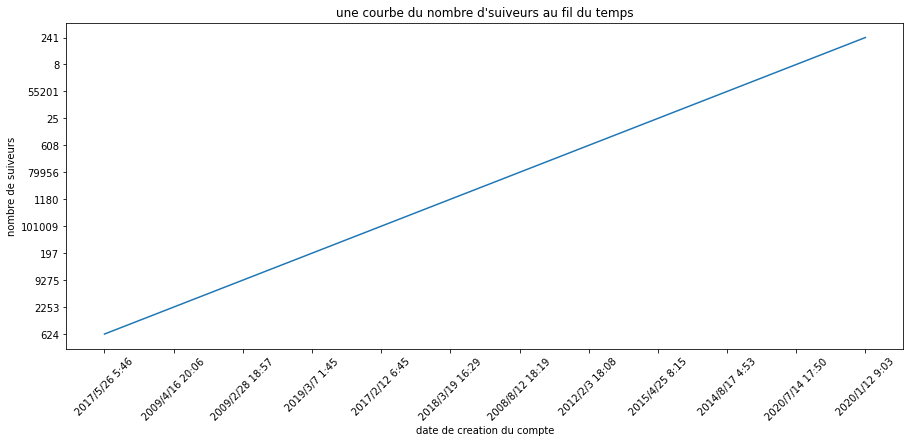

In [12]:

plt.subplots(figsize=(15,6))
first_data = data[0:12]
plt.plot(first_data['user_created'],first_data['user_followers'])
plt.xticks(rotation=45)
plt.xlabel('date de creation du compte')
plt.ylabel('nombre de suiveurs')
plt.title("une courbe du nombre d'suiveurs au fil du temps")
plt.show()


5. Que peut on observer ?
Le temps de création du compte est proportionnel au nombre de followers de l'utilisateur

In [13]:
#6. Identifiez et donnez le nombre de données vides (en nombre et en %)
data.isna().sum()

user_name             847
user_location       37802
user_description    11874
user_created         2448
user_followers       3450
user_friends         3493
user_favourites      3670
user_verified        4030
date                 4247
text                 5189
hashtags            53692
source               4659
is_retweet           8050
dtype: int64

↑Nous pouvons voir que chaque colonne manque beaucoup de données et que la colonne hashtags manque le plus de données.

In [24]:
#7. Quelle stratégie allez vous adopter pour traiter les données manquantes et pourquoi?
def donnees_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
         pourcentage = round((dataset[colonne].isnull().sum()/dataset.shape[0]) * 100, 2)
         print ("Données manquantes pour {}: {}%".format(colonne,pourcentage))

donnees_manquantes(data, ['user_name', 'user_location', 'user_description','user_created', 'user_followers','user_friends','user_favourites','user_verified','date','text','hashtags','source','is_retweet',])

Données manquantes pour user_name: 0.47%
Données manquantes pour user_location: 20.87%
Données manquantes pour user_description: 6.55%
Données manquantes pour user_created: 1.35%
Données manquantes pour user_followers: 1.9%
Données manquantes pour user_friends: 1.93%
Données manquantes pour user_favourites: 2.03%
Données manquantes pour user_verified: 2.22%
Données manquantes pour date: 2.34%
Données manquantes pour text: 2.86%
Données manquantes pour hashtags: 29.64%
Données manquantes pour source: 2.57%
Données manquantes pour is_retweet: 4.44%


In [25]:
def position_donnes_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        index_missing = dataset[pd.isnull(dataset[colonne])].index
        print(list(index_missing))
    
position_donnes_manquantes(data,['user_name', 'user_location', 'user_description','user_created', 'user_followers','user_friends','user_favourites','user_verified','date','text','hashtags','source','is_retweet'])  

[2300, 2484, 2811, 2986, 3033, 3643, 3971, 4136, 4283, 4431, 4433, 4910, 5563, 5702, 5704, 5800, 5802, 6085, 6432, 6473, 6651, 6653, 6707, 6737, 7331, 7394, 7487, 7538, 7786, 7824, 7921, 7923, 8000, 8205, 8960, 9411, 10447, 11310, 11312, 11840, 11890, 11892, 11983, 12012, 12071, 12141, 13640, 13642, 13689, 15115, 15426, 15889, 15891, 15894, 16393, 16395, 17118, 17131, 17212, 17234, 17454, 17650, 18105, 18142, 18330, 18405, 18594, 18728, 19667, 19687, 19911, 20077, 20375, 20377, 20379, 20417, 20419, 20421, 20423, 20484, 20486, 20508, 20510, 20526, 20576, 20578, 21166, 21168, 21213, 21590, 22407, 22409, 22651, 22696, 22705, 22724, 23463, 23854, 25598, 25784, 25832, 25968, 25973, 26268, 26379, 26794, 27424, 27426, 27569, 27789, 27791, 27891, 28274, 28276, 29201, 29447, 29587, 29826, 29929, 29940, 31619, 33234, 33266, 33317, 33931, 34046, 34605, 35037, 35145, 35147, 35250, 35252, 35254, 35609, 35614, 36071, 36287, 36628, 36746, 37077, 37079, 37355, 37357, 37686, 37698, 37843, 38227, 38267,